395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9637 - loss: 0.3646


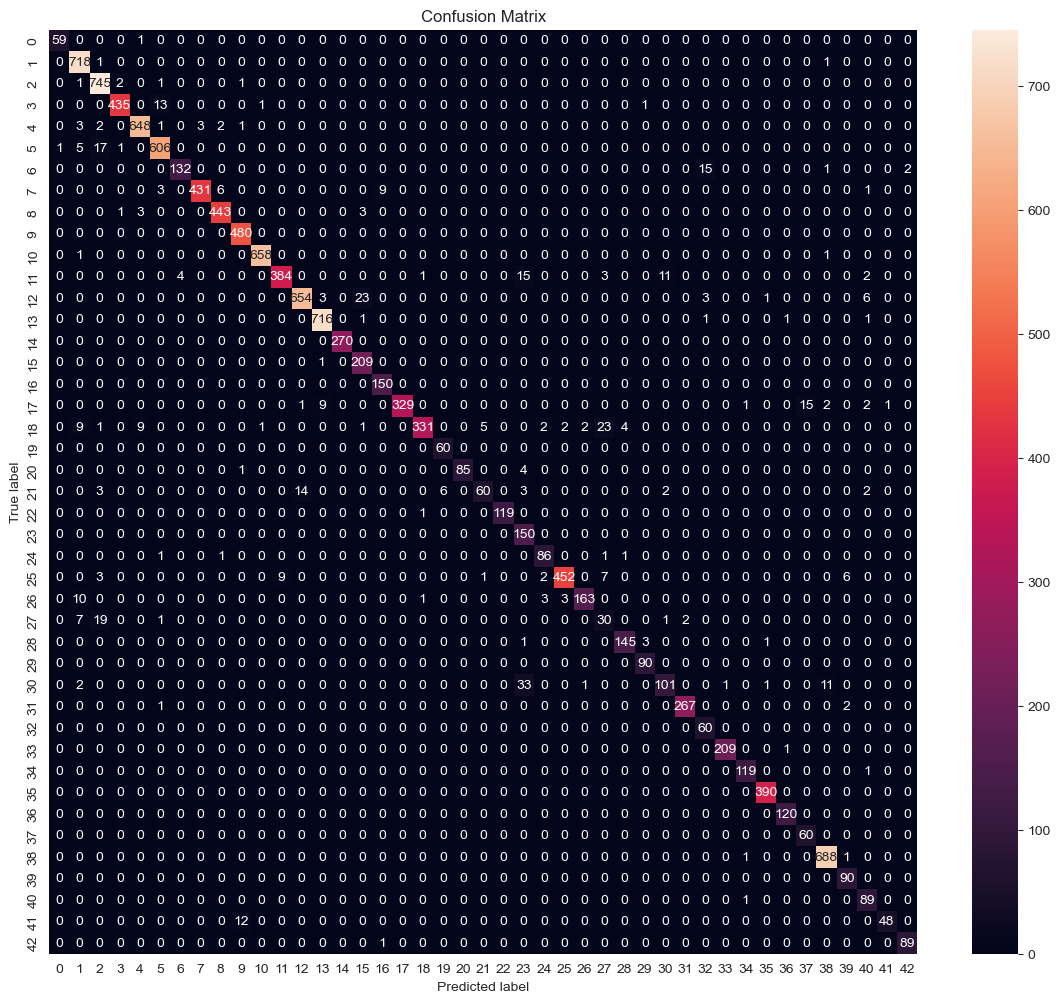

In [1]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import os
from sklearn.metrics import confusion_matrix

model = load_model("saved_model/model3_deeper_cnn.h5")
with open(os.path.join("dataset", "test.p"), mode='rb') as test_data:
    test = pickle.load(test_data)

X_test, y_test = test['features'], test['labels']

X_test_norm = X_test / 255

y_pred_probs = model.predict(X_test_norm)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)

model.evaluate(X_test_norm, y_test, verbose=1)

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()